<a href="https://colab.research.google.com/github/Taitilchheda/Emotion-Recognition/blob/main/emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from keras.models import model_from_json
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import numpy as np


In [ ]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2024-04-03 17:44:12--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2024-04-03 17:44:12--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc548db475c294697283c8013101.dl.dropboxusercontent.com/cd/0/inline/CQVsEdQYs79NxFFyLwKCtEMoVh_uzlkmN-cj4HsjQUusmNGgJ4kZw4IVPlyuu9WM2kG9xjRqiNIejWytAuYBV3ShRXRTZRdJJMeguh0nz_vSWJw3emNkWBhCztLxjWtYUyJTqREEfku7DTyY2gZq5eFa/file# [following]
--2024-04-03 17:44:12--  https://uc548db475c294697283c8013101.dl.dropboxusercontent.com/cd/0/inline/CQVsEdQYs79NxFFyLwKCtEMoVh_uzlkmN-cj4HsjQUusmNGgJ4kZw4IVPlyuu9WM2kG9xjRqiNIejWytAuYBV3ShRXRTZRdJJMeg

In [ ]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
Train_dir = '/content/train'
Test_dir = '/content/test'

In [ ]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "Completed")
    return image_paths,labels

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(Train_dir)

disgust Completed
fear Completed
happy Completed
neutral Completed
angry Completed
surprise Completed
sad Completed


In [ ]:
print(train)

                                              image    label
0      /content/train/disgust/Training_11550217.jpg  disgust
1      /content/train/disgust/Training_84918555.jpg  disgust
2       /content/train/disgust/Training_3858356.jpg  disgust
3      /content/train/disgust/Training_15256337.jpg  disgust
4      /content/train/disgust/Training_98917043.jpg  disgust
...                                             ...      ...
28704      /content/train/sad/Training_36103759.jpg      sad
28705      /content/train/sad/Training_42055139.jpg      sad
28706      /content/train/sad/Training_55597740.jpg      sad
28707      /content/train/sad/Training_35727900.jpg      sad
28708      /content/train/sad/Training_63200337.jpg      sad

[28709 rows x 2 columns]


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(Test_dir)

disgust Completed
fear Completed
happy Completed
neutral Completed
angry Completed
surprise Completed
sad Completed


In [ ]:
print(test)
print(test['image'])

                                               image    label
0      /content/test/disgust/PublicTest_60245179.jpg  disgust
1     /content/test/disgust/PrivateTest_98799539.jpg  disgust
2     /content/test/disgust/PrivateTest_93390752.jpg  disgust
3     /content/test/disgust/PrivateTest_98947037.jpg  disgust
4      /content/test/disgust/PrivateTest_6783917.jpg  disgust
...                                              ...      ...
7173      /content/test/sad/PrivateTest_10247676.jpg      sad
7174       /content/test/sad/PublicTest_37314285.jpg      sad
7175      /content/test/sad/PrivateTest_59198405.jpg      sad
7176       /content/test/sad/PublicTest_10974073.jpg      sad
7177      /content/test/sad/PrivateTest_47084428.jpg      sad

[7178 rows x 2 columns]
0        /content/test/disgust/PublicTest_60245179.jpg
1       /content/test/disgust/PrivateTest_98799539.jpg
2       /content/test/disgust/PrivateTest_93390752.jpg
3       /content/test/disgust/PrivateTest_98947037.jpg
4        /c

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [ ]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
225/225 [==============================] - 21s 56ms/step - loss: 1.8241 - accuracy: 0.2474 - val_loss: 1.8138 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 11s 48ms/step - loss: 1.8102 - accuracy: 0.2527 - val_loss: 1.8017 - val_accuracy: 0.2523
Epoch 3/100
225/225 [==============================] - 11s 48ms/step - loss: 1.7703 - accuracy: 0.2636 - val_loss: 1.6940 - val_accuracy: 0.2999
Epoch 4/100
225/225 [==============================] - 11s 48ms/step - loss: 1.6821 - accuracy: 0.3188 - val_loss: 1.6895 - val_accuracy: 0.3310
Epoch 5/100
225/225 [==============================] - 11s 48ms/step - loss: 1.5881 - accuracy: 0.3767 - val_loss: 1.4827 - val_accuracy: 0.4249
Epoch 6/100
225/225 [==============================] - 11s 49ms/step - loss: 1.5041 - accuracy: 0.4168 - val_loss: 1.3846 - val_accuracy: 0.4677
Epoch 7/100
225/225 [==============================] - 11s 48ms/step - loss: 1.4444 - accuracy: 0.4454 - val_loss: 1.3379 - val_ac

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [ ]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [ ]:
def te(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [ ]:
image = '/content/train/sad/Training_10022789.jpg'
print("original image is of sad")
img = te(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 412ms/step
model prediction is  sad


original image is of sad
1/1 [==============================] - 0s 17ms/step
model prediction is  sad


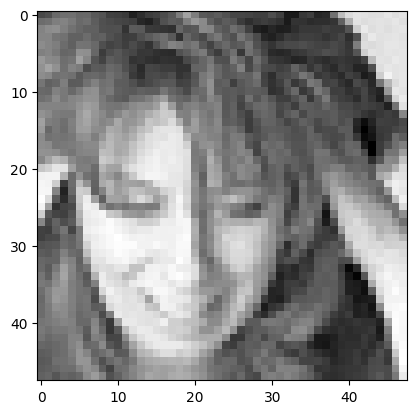

In [ ]:
image = '/content/train/sad/Training_10022789.jpg'
print("original image is of sad")
img = te(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 17ms/step
model prediction is  fear


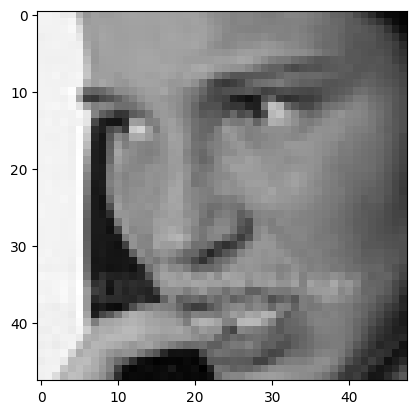

In [ ]:
image = '/content/train/fear/Training_10018621.jpg'
print("original image is of fear")
img = te(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 17ms/step
model prediction is  disgust


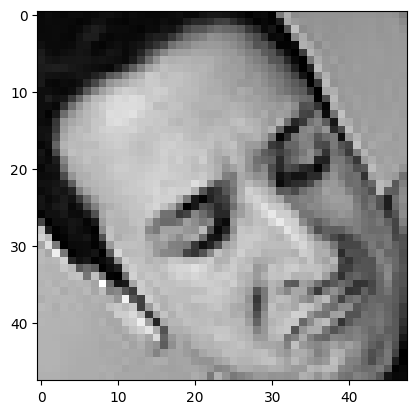

In [ ]:
image = '/content/train/disgust/Training_10371709.jpg'
print("original image is of disgust")
img = te(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 16ms/step
model prediction is  happy


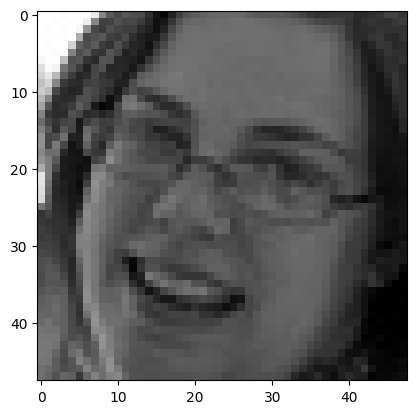

In [ ]:
image = '/content/train/happy/Training_10019449.jpg'
print("original image is of happy")
img = te(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 16ms/step
model prediction is  surprise


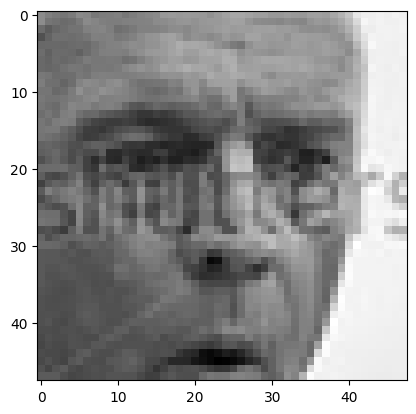

In [ ]:
image = '/content/train/surprise/Training_10013223.jpg'
print("original image is of surprise")
img = te(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of Happy
1/1 [==============================] - 0s 85ms/step
model prediction is  sad


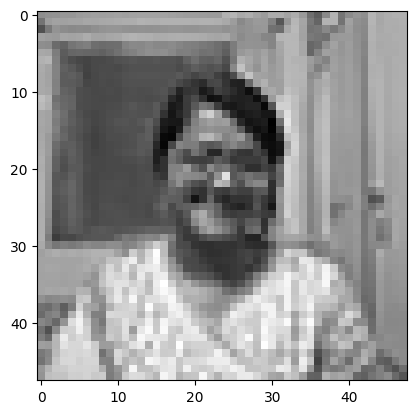

In [ ]:
image = '/content/Sharda_Happy.jpg'
print("original image is of Happy")
img = te(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of Anger
1/1 [==============================] - 0s 17ms/step
model prediction is  sad


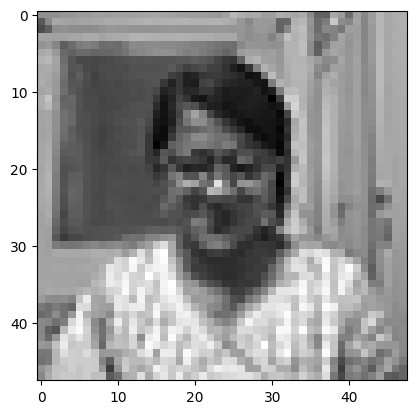

In [ ]:
image = '/content/Sharda_Anger.jpg'
print("original image is of Anger")
img = te(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of Anger
1/1 [==============================] - 0s 60ms/step
model prediction is  happy


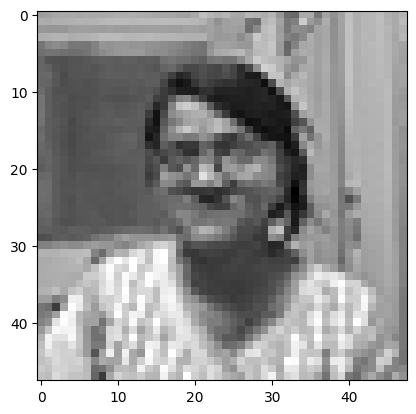

In [ ]:
image = '/content/Sharda_Anger(2).jpg'
print("original image is of Happy")
img = te(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of Surprised
1/1 [==============================] - 0s 25ms/step
model prediction is  surprise


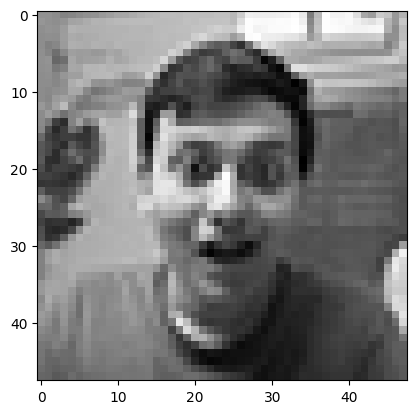

In [ ]:
image = '/content/taitil (surprised).jpg'
print("original image is of Surprised")
img = te(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')